<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

In [2]:
import matplotlib.pyplot as plt
from andi_datasets.datasets_phenom import datasets_phenom
from andi_datasets.utils_videos import get_video_andi
import numpy as np

C:\Users\Gorka\Anaconda3\lib\site-packages\deeptrack\backend\_config.py:11: UserWarning: cupy not installed. GPU-accelerated simulations will not be possible
  warnings.warn(
C:\Users\Gorka\Anaconda3\lib\site-packages\deeptrack\backend\_config.py:25: UserWarning: cupy not installed, CPU acceleration not enabled
  warnings.warn("cupy not installed, CPU acceleration not enabled")


In [33]:
mat = np.zeros((128, 128))

N = 5
wide = 4
for _ in range(N):
    x = int(np.random.randint(0, 128, size = 1))
    y = int(np.random.randint(0, 128, size = 1))
    mat[x:x+wide, y:y+wide] = 1

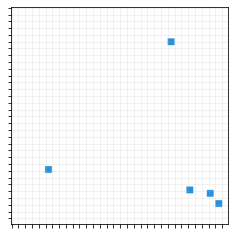

In [38]:
import matplotlib.colors as clr
wide = 4
cmap = clr.LinearSegmentedColormap.from_list('custom blue', ['w','#2790DB'], N=256)
fig, ax = plt.subplots()
ax.imshow(mat, cmap = cmap)
plt.setp(ax, xticks = np.arange(0, 128, wide), yticks = np.arange(0,128,wide),
         yticklabels = [], xticklabels = [])
ax.grid(alpha = 0.2)
for tic in ax.xaxis.get_minor_ticks():
    tic.tick1On = tic.tick2On = False
#fig.savefig('../../../../overleaf/614347c69b54b602cc1d40c9/figures/svg/VIP_matrix.svg')

In [ ]:
"NA": lambda: 0.6 + np.random.rand() * 0.2,  # 1,
        "wavelength": 500e-9,
        "resolution": 1e-6,  # 5e-6
        "magnification": 10,  # effective pixel size is 100 nm # magnifiction changed to 10
        "upscale": 4,
        "refractive_index_medium": 1.33,
        "output_region": [0, 0, 128, 128],
    }

C:\Users\Gorka\Anaconda3\lib\site-packages\deeptrack\optics.py:259: RuntimeWarning: invalid value encountered in sqrt
  * np.sqrt(1 - (NA / refractive_index_medium) ** 2 * RHO),


FileNotFoundError: Could not find correct D for state 1 in 100 steps. State distributions probably too close.

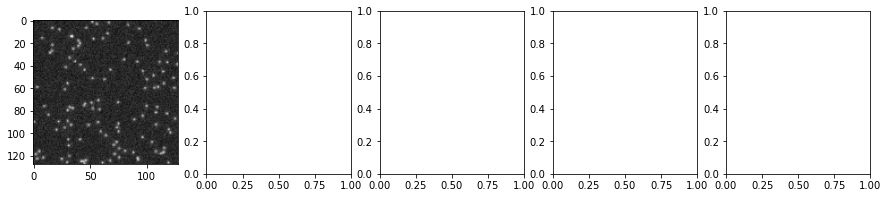

In [3]:
origin = 0 # pixels

DP = datasets_phenom()
fig, axs = plt.subplots(1,5, figsize = (5*3, 3))
datasets = []
for f,ax in zip(DP.avail_models_func, axs.flatten()):
    datasets = f(N = 120, T = 1, L = 128)[0]
    
    video = get_video_andi(datasets, optics_kwargs={"output_region": [origin, origin, 128+origin, 128+origin],
                                                    "NA": 1.4,
                                                    "magnification": 1,
                                                    "resolution": 1e-7,},
                          noise_kwargs={"snr": 10},
                         scatter_kwargs={"intensity":np.random.rand()*9 , "z": 1})
    
    frame = video.update().resolve()
    ax.imshow(frame, cmap = 'gray')
#fig.savefig('../../../../overleaf/614347c69b54b602cc1d40c9/figures/svg/frames_video_hard.svg')

In [ ]:
fram

''

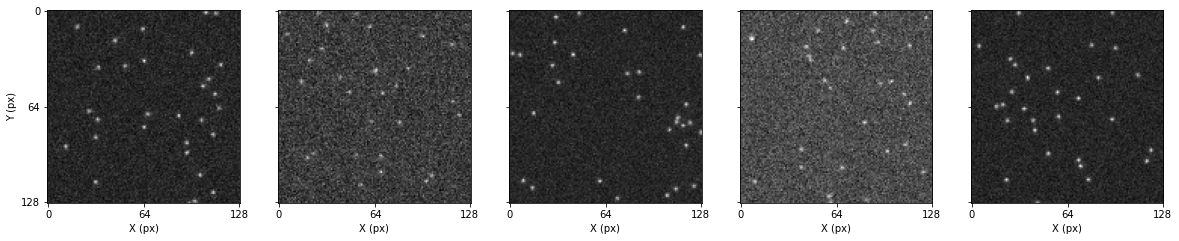

In [8]:
origin = 0 # pixels

DP = datasets_phenom()
fig, axs = plt.subplots(1, len(DP.avail_models_name), figsize = (len(DP.avail_models_name)*4, 4))
datasets = []
for f,ax in zip(DP.avail_models_func, axs):
    datasets = f(N = 30, T = 1, L = 128)[0]
    
    video = get_video_andi(datasets, 
                           optics_kwargs={"output_region": [origin, origin, 128+origin, 128+origin],
                                                    "NA": 1.4,
                                                    "magnification": 1,
                                                    "resolution": 1e-7,},
                           scatter_kwargs={"intensity":np.random.rand()*9 , "z": 1})
    frame = video.update().resolve()
    ax.imshow(frame, cmap = 'gray')
    
plt.setp(axs, 
         xticks = [0, 64, 127], yticks = [0, 64, 127],
         xticklabels = [0, 64, 128], yticklabels = [0, 64, 128],
        xlabel = 'X (px)')
axs[0].set_ylabel('Y (px)')
plt.setp(axs[1:], yticklabels = [])
fig.savefig('../../../../overleaf/614347c69b54b602cc1d40c9/figures/svg/frames_video_easy.svg')
;

In [ ]:
fr

''

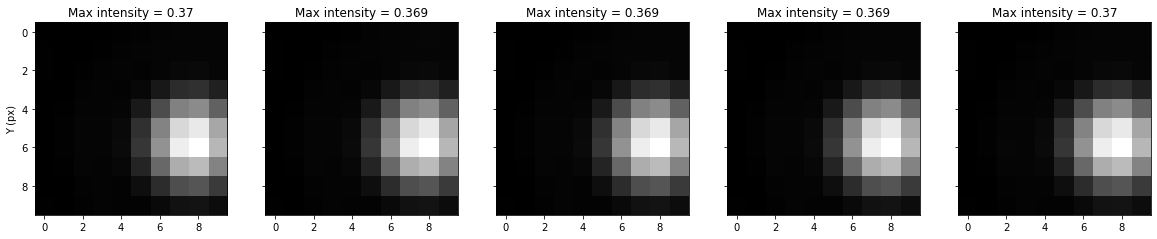

In [20]:
origin = 0 # pixels
from andi_datasets.models_phenom import models_phenom
MP = models_phenom()

fig, axs = plt.subplots(1, 5, figsize = (5*4, 4))
datasets = []

L = 10
datasets = MP.single_state(N = 1, T = 5, L = L,Ds = 0)[0]
    
video = get_video_andi(datasets, 
                       optics_kwargs={"output_region": [origin, origin, L+origin, L+origin],
                                                "NA": 1.4,
                                                "magnification": 2,
                                                "resolution": 1e-7,},
                       scatter_kwargs={"intensity":np.random.rand()*9 , "z": 1},
                       noise_kwargs={"snr": 1000}
                                     )
frame = video.update().resolve()

for fr, ax in zip(frame, axs):
    ax.imshow(fr, cmap = 'gray')
    ax.set_title(f'Max intensity = {np.round(np.max(fr), 3)}')
    
#plt.setp(axs, 
#         xticks = [0, 64, 127], yticks = [0, 64, 127],
 #        xticklabels = [0, 64, 128], yticklabels = [0, 64, 128],
  #      xlabel = 'X (px)')
axs[0].set_ylabel('Y (px)')
plt.setp(axs[1:], yticklabels = [])
#fig.savefig('../../../../overleaf/614347c69b54b602cc1d40c9/figures/svg/frames_fig1.svg')
;

In [9]:
np.max(fr)

0.7768387083110673

In [84]:
origin = 50 # pixels
video = get_video_andi(datasets[0], optics_kwargs={"output_region": [origin, origin, 128+origin, 128+origin]}) #change the output region to see the video

To store generated videos as a sequence of frames use ``update().resolve()``

In [85]:
video_frames = video.update().resolve()

In [1]:
plt.imshow(video_frames[0])

NameError: name 'plt' is not defined